In [2]:
!pip install pandas

     --------------------------------------- 10.6/10.6 MB 32.8 MB/s eta 0:00:00
     ------------------------------------- 502.3/502.3 kB 15.9 MB/s eta 0:00:00
     ------------------------------------- 341.8/341.8 kB 22.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
df = pd.read_csv('dataMnist/sign_mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [30]:
def load_data(path):
    df = pd.read_csv(path)
    y = np.array([label if label < 9
                  else label-1 for label in df['label']])
    df = df.drop('label', axis=1)
    x = np.array([df.iloc[i].to_numpy().reshape((28, 28))
                  for i in range(len(df))]).astype(float)
    x = np.expand_dims(x, axis=3)
    y = pd.get_dummies(y).values
  
    return x, y
  
X_train, Y_train = load_data('dataMnist/sign_mnist_train.csv')
X_test, Y_test = load_data('dataMnist/sign_mnist_test.csv')

In [4]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(27455, 28, 28, 1) (27455, 24)
(7172, 28, 28, 1) (7172, 24)


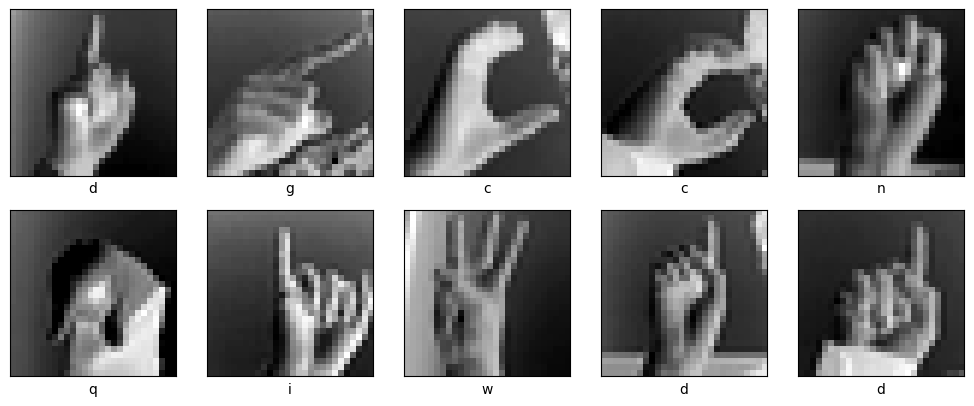

In [5]:
class_names = list(string.ascii_lowercase[:26].replace(
    'j', '').replace('z', ''))
  
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(Y_train, axis=1)[i]])
plt.tight_layout()
plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, MaxPool2D, LSTM

In [18]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=32,                         kernel_size=(3, 3),                           activation='relu',                           input_shape=(28, 28, 1)),
#     tf.keras.layers.MaxPooling2D(2, 2),
  
#     tf.keras.layers.Conv2D(filters=64,                           kernel_size=(3, 3),                           activation='relu'),    tf.keras.layers.MaxPooling2D(2, 2),
  
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(24, activation='softmax')
# ])
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(24, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                      

In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
model.fit??

Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Source:   
    @traceback_utils.filter_traceback
    def fit(
        self,
        x=None,
        y=None,
        batch_size=None,
        epochs=1,
        verbose="auto",
        callbacks=None,
        validation_split=0.0,
        validation_data=None,
        shuffle=True,
        class_weight=None,
        sample_weight=None,
        initial_epoch=0,
        steps_per_epoch=None,
        validation_steps=None,
        validation_batch_size=None,
        validation_freq=1,
        max_queue_size=10,
        workers=1,
        use_multiprocessing=Fal

In [20]:
history = model.fit(X_train,
                    Y_train,
                    epochs=10,
                    verbose=1)

Epoch 1/10
858/858 [==============================] - 66s 77ms/step - loss: 1.8839 - accuracy: 0.5026
Epoch 2/10
858/858 [==============================] - 65s 76ms/step - loss: 0.3461 - accuracy: 0.8825
Epoch 3/10
858/858 [==============================] - 66s 77ms/step - loss: 0.1698 - accuracy: 0.9455
Epoch 4/10
858/858 [==============================] - 66s 77ms/step - loss: 0.1395 - accuracy: 0.9558
Epoch 5/10
858/858 [==============================] - 65s 75ms/step - loss: 0.1024 - accuracy: 0.9669
Epoch 6/10
858/858 [==============================] - 65s 75ms/step - loss: 0.0899 - accuracy: 0.9742
Epoch 7/10
858/858 [==============================] - 64s 75ms/step - loss: 0.0892 - accuracy: 0.9743
Epoch 8/10
858/858 [==============================] - 66s 77ms/step - loss: 0.0929 - accuracy: 0.9737
Epoch 9/10
858/858 [==============================] - 68s 79ms/step - loss: 0.0637 - accuracy: 0.9813
Epoch 10/10
858/858 [==============================] - 66s 76ms/step - loss: 0.067

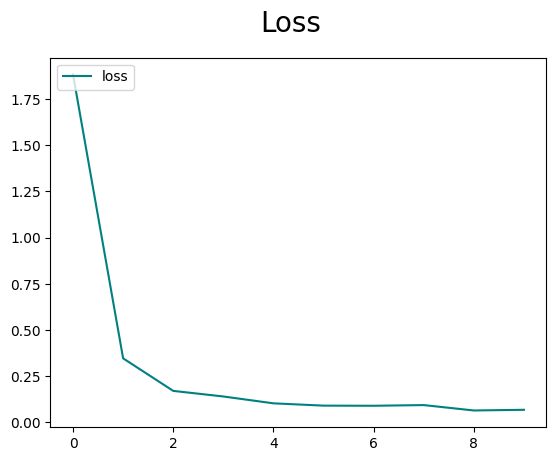

In [21]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

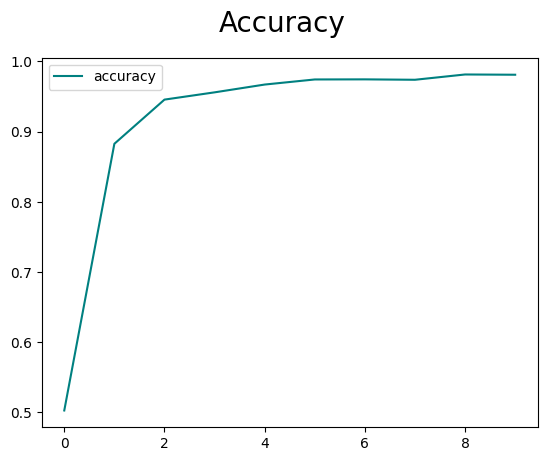

In [22]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [23]:
score = model.evaluate(X_test,Y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.33011704683303833
Test accuracy: 0.9358617067337036


In [25]:
import os

In [31]:
loaded_model = tf.keras.models.load_model(os.path.join('models_v3','aslmode1_main_to_mnist.h5'))

In [33]:
#Evaluate model
score = loaded_model.evaluate(X_test,Y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

ValueError: in user code:

    File "C:\Study\Biai\aslrecognition\Lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "C:\Study\Biai\aslrecognition\Lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Study\Biai\aslrecognition\Lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "C:\Study\Biai\aslrecognition\Lib\site-packages\keras\engine\training.py", line 1788, in test_step
        y_pred = self(x, training=False)
    File "C:\Study\Biai\aslrecognition\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Study\Biai\aslrecognition\Lib\site-packages\keras\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "conv2d_3" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 28, 28, 1)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28, 28, 1), dtype=float32)
      • training=False
      • mask=None
